<a href="https://colab.research.google.com/github/ganuwoahh/tdlta/blob/main/Week1_Optimizers_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

#one hot encoding
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
#function to create simple nn

def create_model():
    return Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [5]:
#defining all the optimizers in a dictionary

optimizers = {
    "Gradient Descent (GD)": (tf.keras.optimizers.SGD(learning_rate=0.01), x_train.shape[0]),
    "Stochastic Gradient Descent (SGD)": (tf.keras.optimizers.SGD(learning_rate=0.01), 1),
    "Mini-Batch Gradient Descent (BGD)": (tf.keras.optimizers.SGD(learning_rate=0.01), 64),
    "Momentum": (tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 64),
    "RMSprop": (tf.keras.optimizers.RMSprop(learning_rate=0.001), 64),
    "Adam": (tf.keras.optimizers.Adam(learning_rate=0.001), 64),
}

In [6]:
history_results = {}
training_times = {}

for name, (optimizer, batch_size) in optimizers.items():
    print(f"\nTraining with {name}...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Track training time
    start_time = time.time()

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=5,
        batch_size=batch_size,
        verbose=1
    )

    end_time = time.time()
    training_time = end_time - start_time
    training_times[name] = training_time

    history_results[name] = history.history


Training with Gradient Descent (GD)...
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0561 - loss: 2.3731 - val_accuracy: 0.0568 - val_loss: 2.3648
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.0600 - loss: 2.3618 - val_accuracy: 0.0607 - val_loss: 2.3534
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0645 - loss: 2.3507 - val_accuracy: 0.0648 - val_loss: 2.3423
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - accuracy: 0.0690 - loss: 2.3399 - val_accuracy: 0.0707 - val_loss: 2.3314
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0741 - loss: 2.3293 - val_accuracy: 0.0758 - val_loss: 2.3207

Training with Stochastic Gradient Descent (SGD)...
Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - accuracy: 0.8962 - loss: 0.3395 - val_accuracy: 0.9648 - val_loss: 0.1130
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 153s 2ms/step - accuracy: 0.9691 - loss: 0.1039 - val_accuracy: 0.9713 - val_loss: 0.0858
Epoch 3/5
60000/60000 ━━━━

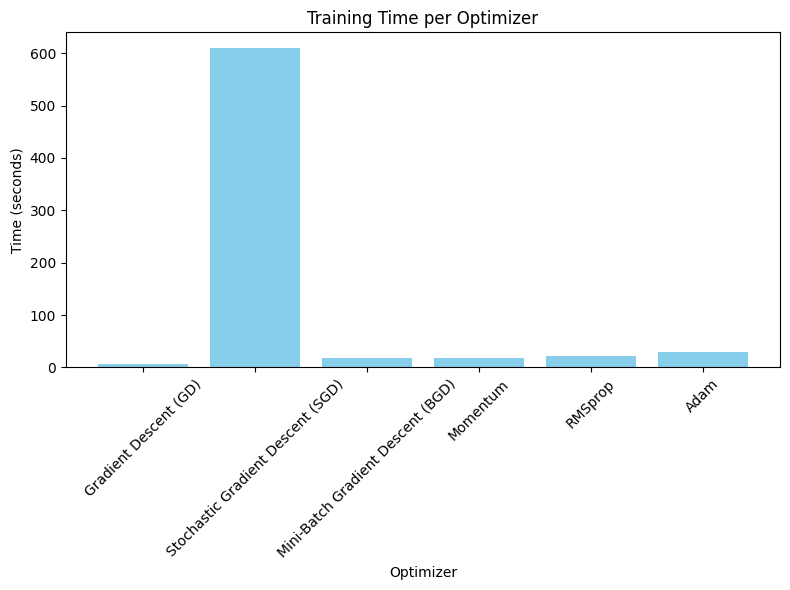

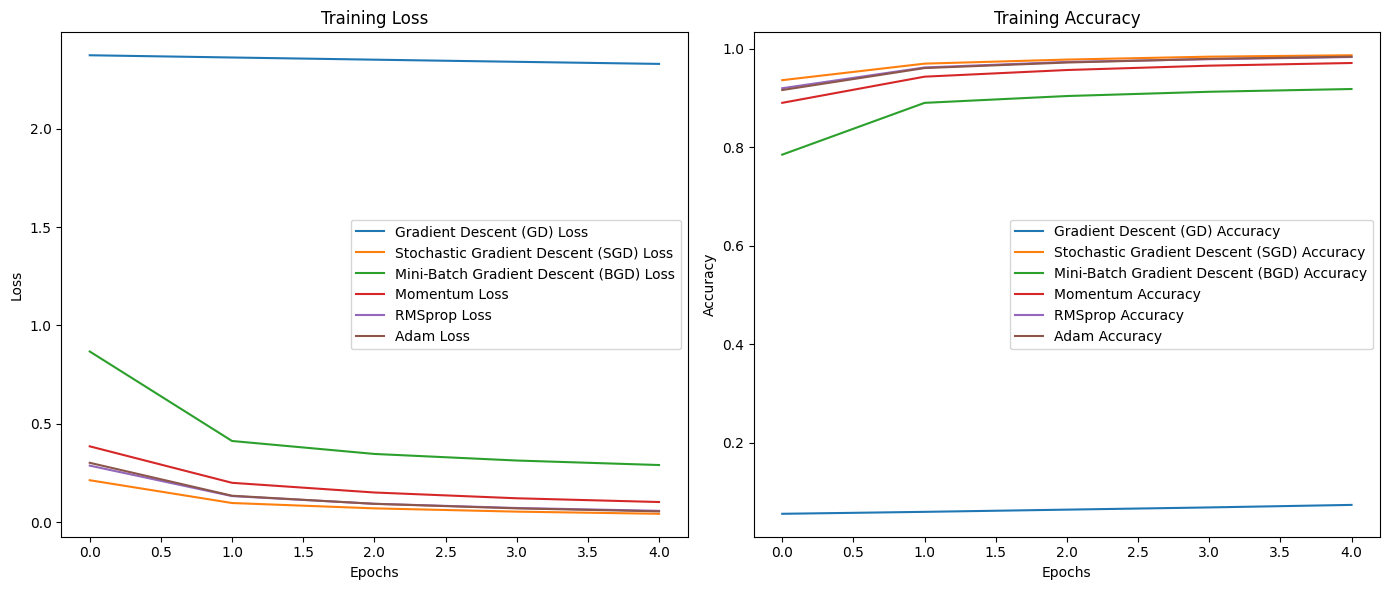

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.title('Training Time per Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for name, history in history_results.items():
    plt.plot(history['loss'], label=f'{name} Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#accuracy
plt.subplot(1, 2, 2)
for name, history in history_results.items():
    plt.plot(history['accuracy'], label=f'{name} Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()